Libraries

In [1]:
library(tidyverse)
library(quanteda)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Package version: 1.4.3
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



Load the Data

In [2]:
tweets <- read_csv("../Data/English_tweets_labelled.csv")

#not enough English tweets
tweets <- filter(tweets, leader != 'Yves-François Blanchet')

tweets <- filter(tweets, `NTL & GLBL LDRSP` == 1)


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_datetime(format = ""),
  leader = col_character(),
  language = col_character(),
  tweet = col_character(),
  `NTL & GLBL LDRSP` = col_double(),
  `AFRD & ECON_INSEC` = col_double(),
  INDG = col_double(),
  `PLR, HM & IMM` = col_double(),
  `ENVIRO & ENRGY` = col_double()
)



In [3]:
head(tweets)

date,leader,language,tweet,NTL & GLBL LDRSP,AFRD & ECON_INSEC,INDG,"PLR, HM & IMM",ENVIRO & ENRGY
2019-09-11 01:57:02,Jagmeet Singh,en,"The stories we heard tonight in London made it clear to me that whether it's expanding health care or fixing the housing crisis, people need a government that's actually in it for them. No more catering to big corporations or the ultra-rich – we need to put people first. #elxn43 https://t.co/216tatEEhN",1,1,0,0,0
2019-09-11 11:36:17,Maxime Bernier,en,"The RCMP wants to investigate the government for obstruction of justice, and the government obstructs the investigation! Only one party is bold enough to make real changes and rid Ottawa of the corruption and the crony capitalism: @peoplespca. https://t.co/pZwL7L0cso",1,0,0,0,0
2019-09-11 12:09:46,Justin Trudeau,en,"Like so many people around the world, I’ll never forget where I was on September 11, 2001. Nearly 3,000 people, including 24 Canadians, died in those terrorist attacks. Today, we remember them and pay tribute to the heroes who stepped up to serve and help others on 9/11.",1,0,0,0,0
2019-09-11 13:52:40,Jagmeet Singh,en,Today we remember the deadliest terrorist attack in American history &amp; pay tribute to all those who lost their lives or were forever changed on 9/11. And we honour the courage of first responders – who put their lives on the line that day and every day. https://t.co/I7Ww72ahUm,1,0,0,0,0
2019-09-13 00:39:56,Jagmeet Singh,en,"""We should move forward with respect and dignity."" Check out Jagmeet's commitment to building a respectful nation-to-nation relationship with Indigenous peoples: https://t.co/wCEA4jNkBW #firstdebate #elxn43",1,0,1,0,0
2019-09-13 01:26:47,Jagmeet Singh,en,Canadians are proud of our role in the world and they want a government that will make the right choices - with rights for people at the centre. Read more about our plan: https://t.co/OCCqeAQRka #firstdebate #elxn43,1,0,0,1,0


Clean the data

In [4]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.tokens <- tokens(tweets$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to uppercase
tweets.tokens <- tokens_toupper(tweets.tokens)

#remove stopwords
tweets.tokens <- tokens_select(tweets.tokens, c(stopwords(), 'AMP'), selection = "remove")

#bag of words
tweets.tokens.dfm <- dfm(tweets.tokens, tolower=FALSE)

Word cloud including tweets from all leaders

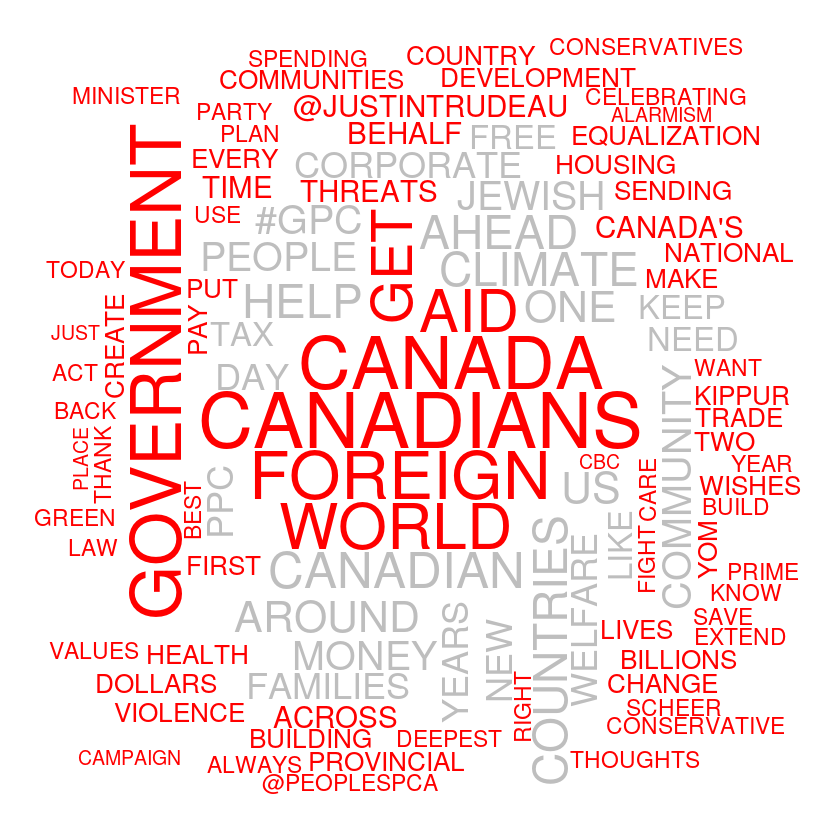

In [5]:
textplot_wordcloud(tweets.tokens.dfm, color=c("red", "gray", "red"), max_words=100)

In order to get wordclouds for each individual leader, split into 5 seperate dataframes

In [6]:
tweets.trudeau <- tweets[tweets$leader=="Justin Trudeau",]
tweets.scheer <- tweets[tweets$leader=="Andrew Scheer",]
tweets.bernier <- tweets[tweets$leader=="Maxime Bernier",]
tweets.may <- tweets[tweets$leader=="Elizabeth May",]
tweets.singh <- tweets[tweets$leader=="Jagmeet Singh",]

Clean the data

In [7]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.trudeau.tokens <- tokens(tweets.trudeau$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.scheer.tokens <- tokens(tweets.scheer$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.bernier.tokens <- tokens(tweets.bernier$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.may.tokens <- tokens(tweets.may$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.singh.tokens <- tokens(tweets.singh$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to uppercase
tweets.trudeau.tokens <- tokens_toupper(tweets.trudeau.tokens)
tweets.scheer.tokens <- tokens_toupper(tweets.scheer.tokens)
tweets.bernier.tokens <- tokens_toupper(tweets.bernier.tokens)
tweets.may.tokens <- tokens_toupper(tweets.may.tokens)
tweets.singh.tokens <- tokens_toupper(tweets.singh.tokens)

#remove stopwords
tweets.trudeau.tokens <- tokens_select(tweets.trudeau.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.scheer.tokens <- tokens_select(tweets.scheer.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.bernier.tokens <- tokens_select(tweets.bernier.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.may.tokens <- tokens_select(tweets.may.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.singh.tokens <- tokens_select(tweets.singh.tokens, c(stopwords(), 'AMP'), selection = "remove")

#bag of words
tweets.trudeau.tokens.dfm <- dfm(tweets.trudeau.tokens, tolower=FALSE)
tweets.scheer.tokens.dfm <- dfm(tweets.scheer.tokens, tolower=FALSE)
tweets.bernier.tokens.dfm <- dfm(tweets.bernier.tokens, tolower=FALSE)
tweets.may.tokens.dfm <- dfm(tweets.may.tokens, tolower=FALSE)
tweets.singh.tokens.dfm <- dfm(tweets.singh.tokens, tolower=FALSE)

Word plots for each leader

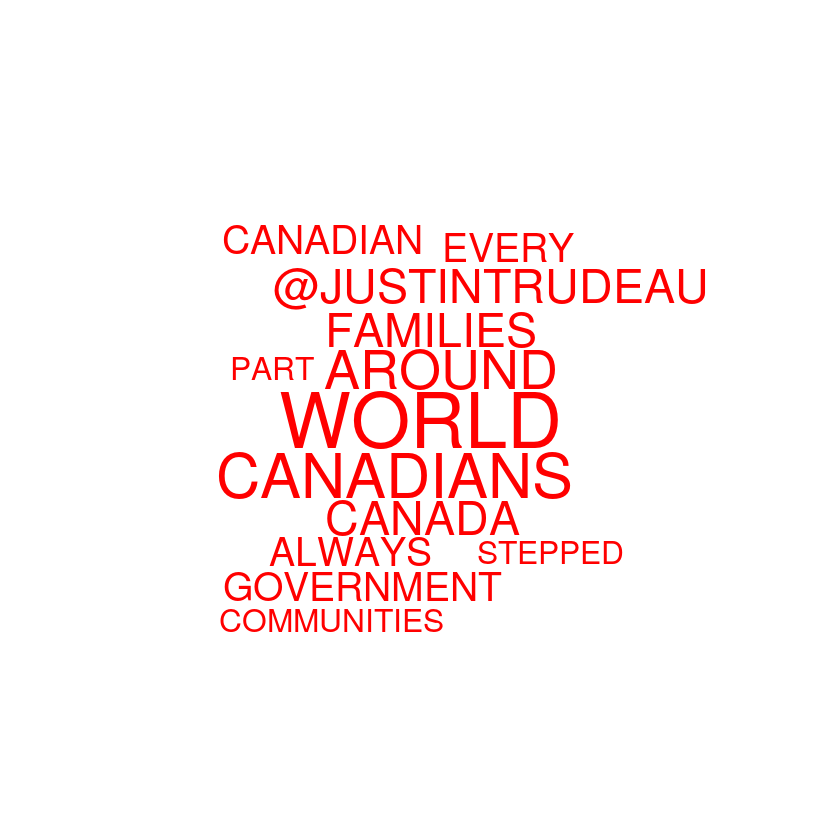

In [8]:
textplot_wordcloud(tweets.trudeau.tokens.dfm, color=c("red"), max_words=100)

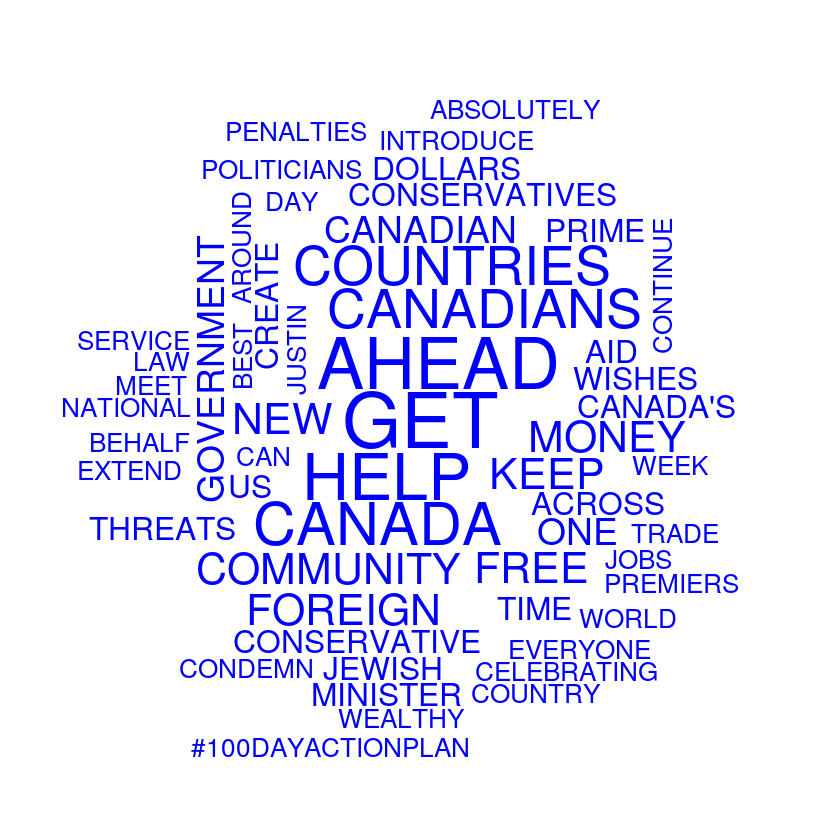

In [9]:
textplot_wordcloud(tweets.scheer.tokens.dfm, color=c("blue"), max_words=100)

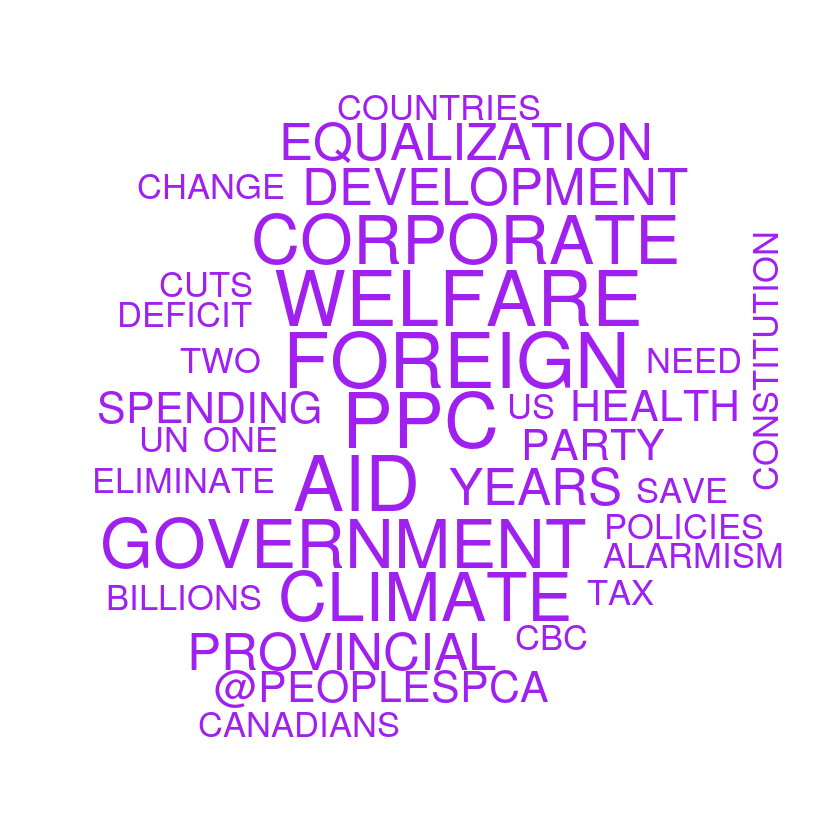

In [10]:
textplot_wordcloud(tweets.bernier.tokens.dfm, color=c("purple"), max_words=100)

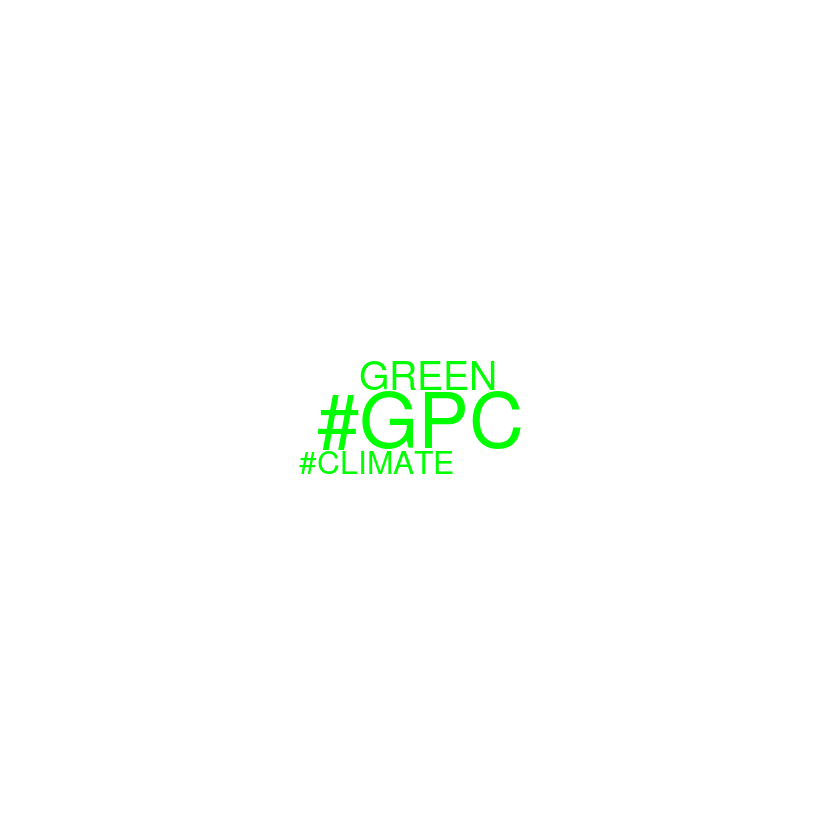

In [11]:
textplot_wordcloud(tweets.may.tokens.dfm, color=c("green"), max_words=100)

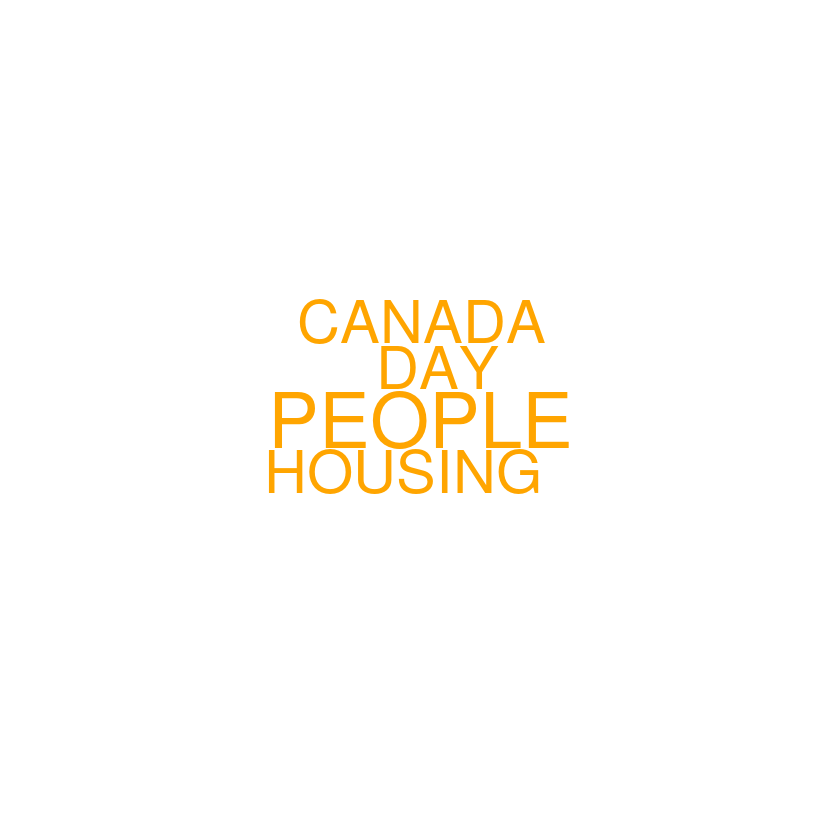

In [12]:
ss <- textplot_wordcloud(tweets.singh.tokens.dfm, color=c("orange"), max_words=100)